# Transfermarkt 데이터 분석 프로젝트
* Transfermarkt에 등록된 market value top 500 선수의 데이터를 분석
* 분석 목적: 
    1. 선수 가치에 영향을 주는 요인 분석하기
    2. 선수 가치를 예측하는 모델 만들기
* 데이터는 웹 크롤러를 활용하여 수집

# EDA
* 전처리는 원하는 대로 진행했다.!
* 이제.. 데이터를 살펴보자!

In [1]:
import pandas as pd
# 부동소수점 표기 방식 변경
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
# seaborn의 색감 + grid
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns
import warnings
# 오류 무시
warnings.filterwarnings('ignore')

In [2]:
# seaborn계열 스타일 사용 시 폰트 재설정
plt.rc('font', family='NanumGothic')
plt.rc('font', size=13)

In [3]:
df = pd.read_csv('source/TransferMarket_preprocessed.csv', index_col=0)
df.head()

,name,age,height,country,position,position-detail,foot,league,team,joined,contract expires,goals,assists,appearances,goals conceded,clean sheets,market value
0,Kylian Mbappé,21,178,France,Forward,Centre-Forward,right,Ligue 1,Paris Saint-Germain,2018-07-01,2022-06-30,30,17,33,0,0,267274026727.40
1,Raheem Sterling,25,170,England,Forward,Left Winger,right,Premier League,Manchester City,2015-07-14,2023-06-30,20,7,39,0,0,213819221381.92
2,Neymar,28,175,Brazil,Forward,Left Winger,right,Ligue 1,Paris Saint-Germain,2017-08-03,2022-06-30,18,10,22,0,0,213819221381.92
3,Sadio Mané,27,174,Senegal,Forward,Left Winger,right,Premier League,Liverpool FC,2016-07-01,2023-06-30,18,12,38,0,0,200455520045.55
4,Mohamed Salah,27,175,Egypt,Forward,Right Winger,left,Premier League,Liverpool FC,2017-07-01,2023-06-30,20,9,40,0,0,200455520045.55


In [4]:
df.describe()

,age,height,goals,assists,appearances,goals conceded,clean sheets,market value
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,24.72,181.89,5.03,3.65,27.55,1.21,0.40,53951935035.19
std,3.33,6.52,6.23,3.92,8.99,6.47,2.13,33001071498.21
min,16.00,163.00,0.00,0.00,0.00,0.00,0.00,26727402672.74
25%,22.00,177.00,1.00,1.00,23.00,0.00,0.00,33409253340.92
50%,25.00,182.00,3.00,2.00,29.00,0.00,0.00,42763844276.38
75%,27.00,187.00,7.00,5.00,33.00,0.00,0.00,66818506681.85
max,35.00,199.00,40.00,21.00,75.00,51.00,16.00,267274026727.40


### market value

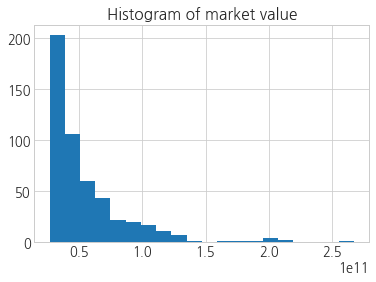

In [5]:
plt.hist(df['market value'], bins=20)
plt.title('Histogram of market value')
plt.show()

* 500억 이하의 시장 가치에 데이터가 몰려있는 것을 볼 수 있다.

### age
* 축구 중계나 콘텐츠를 보다보면 나이가 어릴수록 가치가 높다는 이야기를 자주 한다.
    * 사실 축구계에만 적용되는 이야기는 아니고, 대부분의 산업에서 적용되는 말이긴 하다.
    * 나이가 어리면 취업에 유리하다 등.....(ㅠㅠ)
* 실제로 축구 선수가 나이가 어릴수록 몸값이 비싼 지를 중점으로 보자.

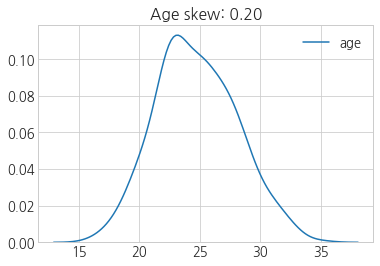

In [6]:
sns.kdeplot(df.age)
plt.title('Age skew: {:.2f}'.format(df.age.skew()))
plt.show();

corr: 0.11


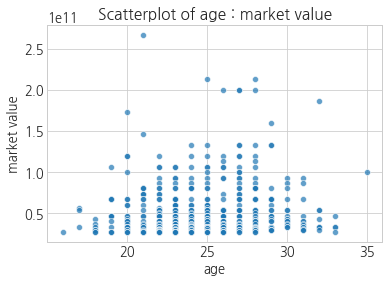

In [7]:
print('corr: {:.2f}'.format(df['age'].corr(df['market value'])))
sns.scatterplot('age', 'market value', data=df, alpha=.7)
plt.title('Scatterplot of age : market value')
plt.show();

* 20대 중반이 될 수록 시장 가치가 높은 선수들이 생기는 것을 볼 수 있다.
* 20대 후반부터는 점차 선수 가치가 하락하는 모습을 보인다.
* 축구 선수의 전성기가 20대 초중반부터 시작되어 20대 중후반에 기량이 만개하는 것을 대변하는 것 같다.

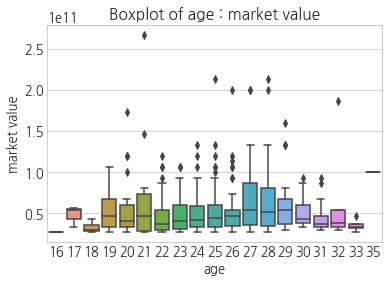

In [8]:
sns.boxplot('age', 'market value', data=df)
plt.title('Boxplot of age : market value')
plt.show();

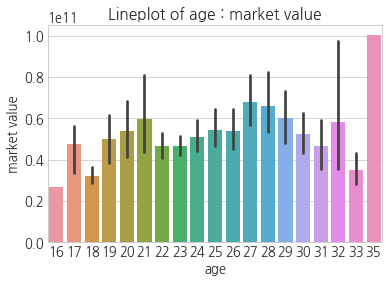

In [9]:
sns.barplot(df['age'], df['market value'])
plt.title('Lineplot of age : market value')
plt.show();

### height
* 축구선수는 키가 클 수록 몸싸움이나 공중볼 경합 등 여러모로 유리하다.
* 하지만 메시를 비롯한 키가 작은 선수들은 비교적 유연하고, 드리블 능력이 뛰어나다.
* 과연 키가 선수 가치에 얼마나 영향을 끼치는지 살펴보자.

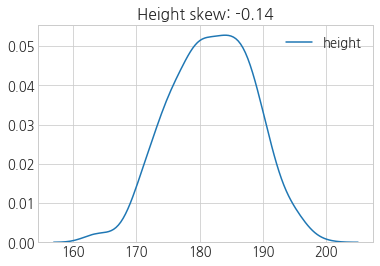

In [10]:
sns.kdeplot(df.height)
plt.title('Height skew: {:.2f}'.format(df.height.skew()))
plt.show;

* 신장은 180초반을 기준으로 오른쪽으로 약간 치우친 종 모양을 보인다.

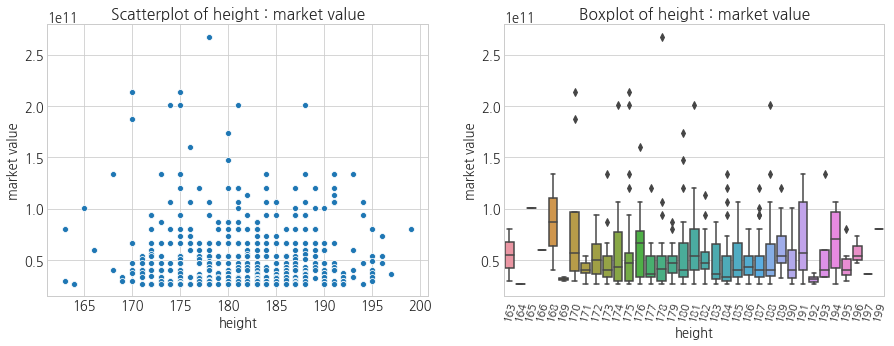

In [11]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot('height', 'market value', data=df, ax=ax[0])
ax[0].set_title('Scatterplot of height : market value')
sns.boxplot('height', 'market value', data=df, ax=ax[1])
ax[1].set_title('Boxplot of height : market value')
plt.xticks(rotation=75, size=11)
plt.show;

* 특정 패턴을 보이지 않는다.
* 실제로는 신장 자체가 선수 가치에 직접적으로 영향을 주는 것 같지는 않다.

### country
* 각 리그에서 자국 출신 선수를 우대하는 경향이 있다.
* 특히, epl에서는 잉수저라는 말(잉글랜드 + 금수저)이 있을 정도로, 자국 선수를 우대한다.
* 그럼 정말 국적과 선수 가치가 영향이 있는지 살펴보자.

국가 별 선수 수:
France         66
Spain          61
Brazil         52
England        48
Germany        32
Italy          25
Portugal       22
Netherlands    18
Argentina      17
Belgium        16
Name: country, dtype: int64


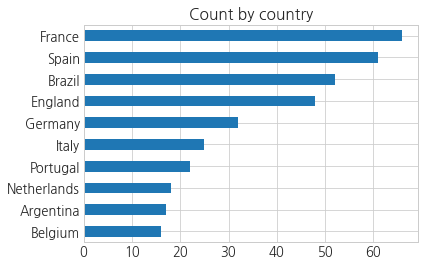

In [12]:
print('국가 별 선수 수:\n{}'.format(df.country.value_counts()[:10]))
df.country.value_counts()[:10].sort_values().plot('barh')
plt.title('Count by country')
plt.show();

* 축구 5대 리그 국가인 프랑스, 스페인, 영국, 독일, 이탈리아의 선수가 많은 것을 볼 수 있다.
* 비유럽 국가 중에서는 브라질이 3번째로 높았고, top10에선 유럽 선수들이 포진되어있다.

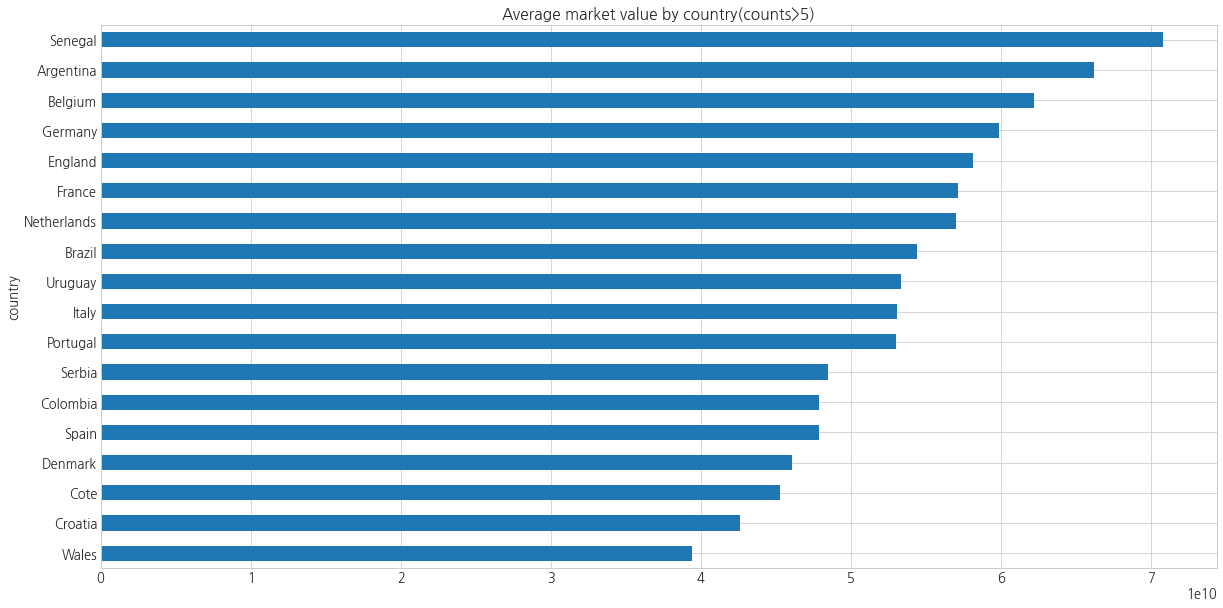

In [13]:
# 소속 선수가 5명 이상인 국가의 market value 평균
plt.figure(figsize=(20,10))
df['market value'].groupby(df['country']).mean()[df['name'].groupby(df['country']).count()>5].sort_values().plot('barh')
plt.title('Average market value by country(counts>5)')
plt.show()

* 세네갈 선수의 평균 시장 가치가 가장 높다.
    * 아마 사디오 마네 선수로 인해 평균값이 올라간 것으로 보인다.
* 잉글랜드, 프랑스, 독일 등 주요 리그 5대 국가의 선수들의 평균도 500억 이상으로, 꽤 높다.
* 시장 가치는 편차가 크고, 이상값의 영향을 많이 받기 때문에, 평균 대신 중앙값으로 데이터를 다시 살펴보자.

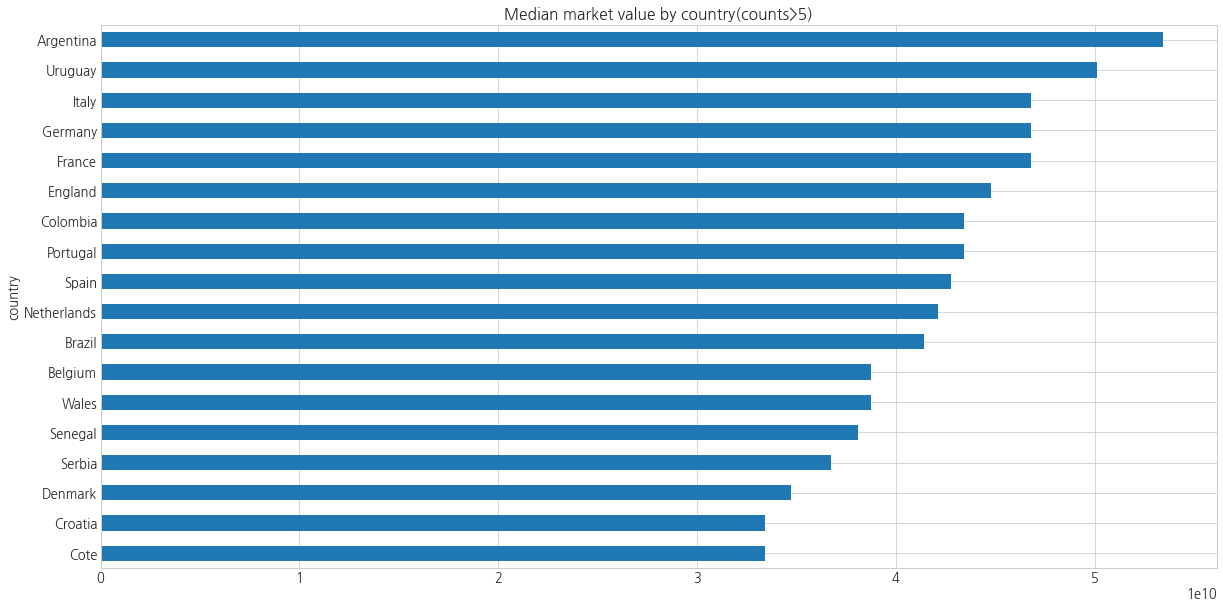

In [14]:
# 소속 선수가 5명 이상인 국가의 market value 중앙값
plt.figure(figsize=(20,10))
df['market value'].groupby(df['country']).median()[df['name'].groupby(df['country']).count()>5].sort_values().plot('barh')
plt.title('Median market value by country(counts>5)')
plt.show()

* 중앙값으로 살펴보니, 세네갈의 순서는 하위 5위권으로 밀려났다.
* 1위는 아르헨티나로, 중앙값이 500억 이상이었다.
* 주요 5국은 여전히 높은 순위를 보이고 있다.
* 평균으로 보았을 때 중간 위치에 있었던 우루과이가 2번째로 높게 올라왔다.

### position, position-detail
* 축구에서는 주로 공격수의 몸값이 높다.
    * 골을 넣어야 이길 수 있는데, 골은 주로 공격수가 넣기 때문이다.
* 과연 포지션 별로 시장 가치가 어떻게 다른지 살펴보자.

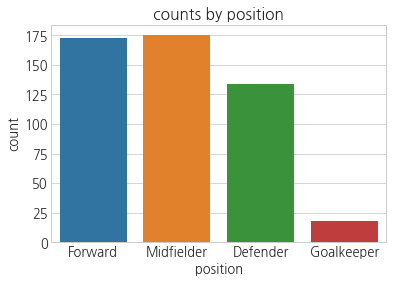

In [15]:
sns.countplot('position', data=df)
plt.title('counts by position')
plt.show()

* 미드필더, 공격수, 수비수, 골키퍼 순으로 선수 수가 많다.
* 주의해야 할 점은, 골키퍼는 25명 이하로, 추후 통계량을 확인할 때 샘플 수의 부족으로 대표성을 가지지 못할 수도 있다는 것

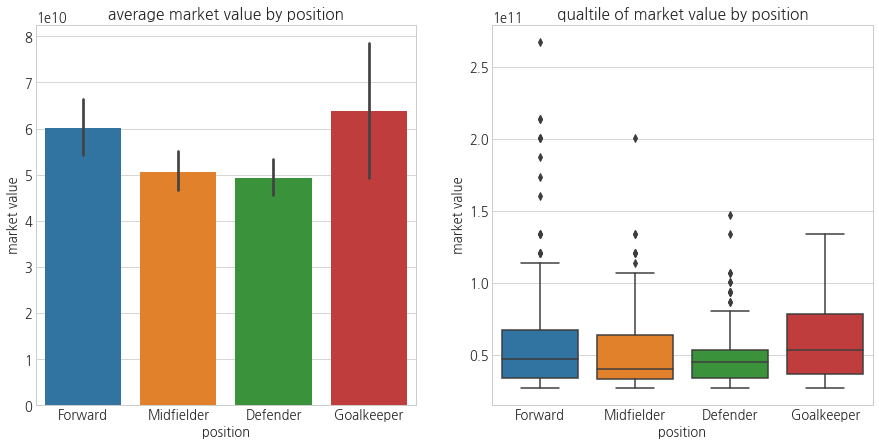

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot('position', 'market value', data=df, ax=ax[0], )
ax[0].set_title('average market value by position')
sns.boxplot('position', 'market value', data=df, ax=ax[1])
ax[1].set_title('qualtile of market value by position')
plt.show()

In [17]:
import ipywidgets as widgets
from ipywidgets import interact

# Multiple Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def visualize_by_position(df):
    def view_marketvalue(position):
        data = df.loc[df['position'] == position]['market value']
        ax = data.plot('box');
        ax.set_title('boxplot of {}'.format(position))
    interact(view_marketvalue, position=list(df['position'].unique()))
visualize_by_position(df)

interactive(children=(Dropdown(description='position', options=('Forward', 'Midfielder', 'Defender', 'Goalkeep…

* 평균으로 보면 공격수의 몸값이 높지만, 상자그림으로 확인하니, 이상값이 다른 포지션에 비해 많음
* 골키퍼를 제외하면 중앙값이 모두 500억 이하에 위치

### foot
* 축구에선 주발에 따라 가치를 다르게 매기기도 한다.
* 오른발에 비해 왼발이 더 주목을 받고, 양발은 큰 장점으로 평가받는다.

right    341
left     134
both      25
Name: foot, dtype: int64


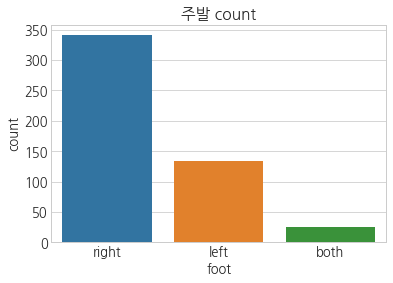

In [18]:
print(df.foot.value_counts())
sns.countplot(df.foot)
plt.title('주발 count')
plt.show();

* 실제로 오른발 선수가 가장 많고, 양발 선수는 25명에 불과하다.

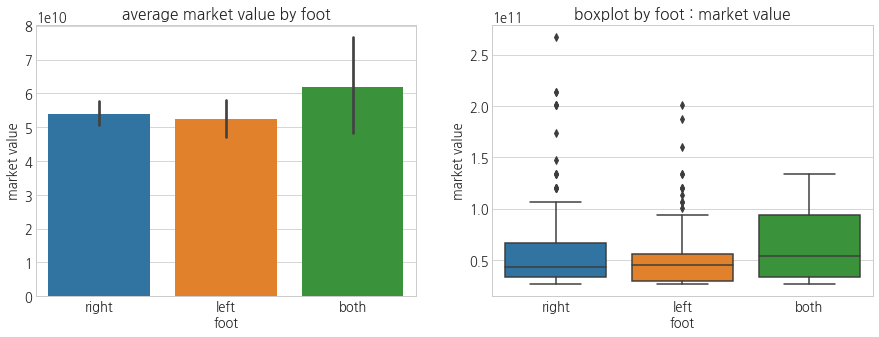

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot('foot', 'market value', data=df, ax=ax[0])
ax[0].set_title('average market value by foot')
sns.boxplot('foot', 'market value', data=df, ax=ax[1])
ax[1].set_title('boxplot by foot : market value')
plt.show();

* 주발이 분명 포지션 소화에 영향은 끼치겠지만, 이것이 시장 가치와는 큰 연관이 없어보인다.
* 그럼 주발이 포지션에 정말 영향을 끼쳤을까?

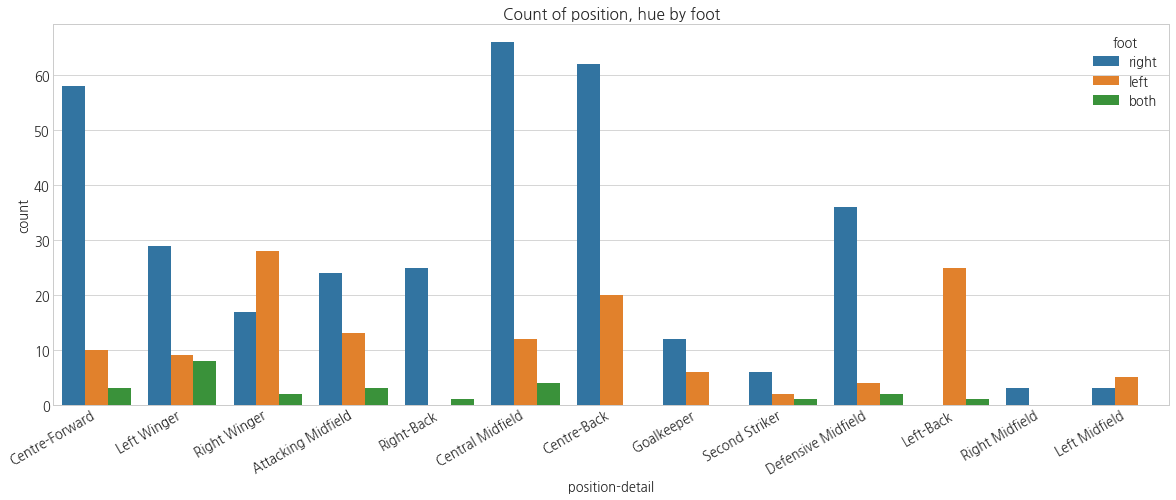

In [20]:
plt.figure(figsize=(20, 7))
sns.countplot('position-detail', hue='foot', data=df)
plt.xticks(rotation=30, ha='right')
plt.title('Count of position, hue by foot')
plt.show();

* 오른쪽 윙포워드, 왼쪽 풀백, 왼쪽 미드필더는 확실히 왼발잡이 선수가 많다.
* 왼쪽 풀백, 미드필더는 주로 크로스, 패스 등을 할 때 왼발이 유리하기 때문에 왼쪽 주발 선수가 많다.
* 오른쪽 윙포워드는 최근 부상하고있는 반댓발윙어, 즉, 측면에서 안쪽으로 치고들어오는 스타일이 많아지며 일어난 현상으로 보인다.
    * 예를들어, 손흥민은 양발잡이이지만 기본적으로 오른발이 주발이기 때문에, 왼쪽 윙어로 많이 출전한다.

### league
* 선수가 어느 팀, 어느 리그에 속해있느냐에 따라 가치가 달라지는 경우가 있다.
* 그 이유로는 메인 리그가 아니면 팬들이나 언론은 그 선수를 잘 주목하지 않는 등이 있다.
* 그럼 각 리그별 시장가치가 어떤 차이를 보이나 살펴보자.

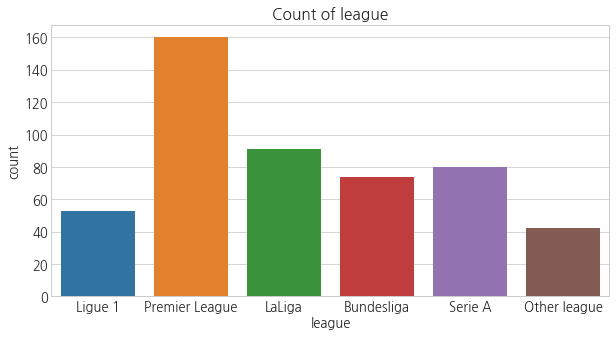

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot('league', data=df)
plt.title('Count of league')
plt.show();

* 5대 리그 중, 프리미어리그 소속 선수가 가장 많다.
* 5대 리그 중에서는 프랑스 리그가 가장 선수 수가 적다.
    * 최근 인기있는 리그의 순위를 말해주는 것 같기도 하다.

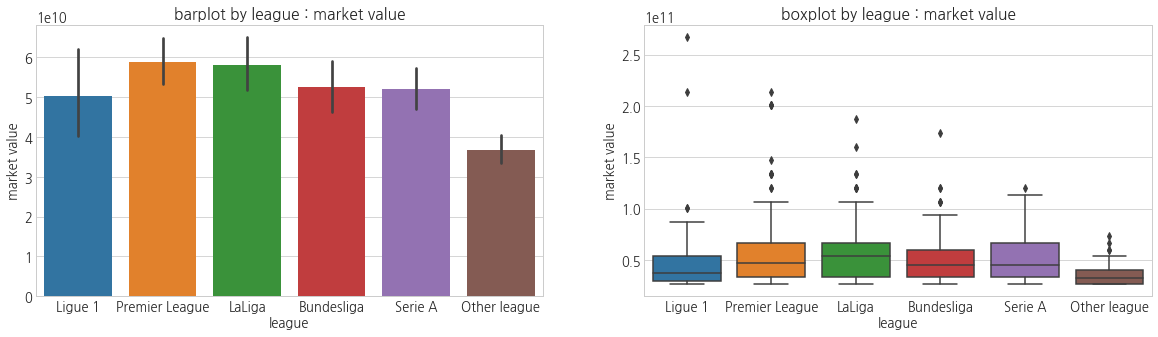

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot('league', 'market value', data=df, ax=ax[0])
sns.boxplot('league', 'market value', data=df, ax=ax[1])
ax[0].set_title('barplot by league : market value')
ax[1].set_title('boxplot by league : market value')
plt.show();

* 기타 리그에 소속된 선수들은 5대 리그에 소속된 선수보다 선수 가치가 낮다는 것을 확인할 수 있다.
* Ligue 1은 네이마르, 음바페의 것으로 보이는 이상값을 제외하면, 타 리그에 비해 선수 가치가 낮은 것을 볼 수 있다.
* 그럼 각 리그별로 몸값이 가장 비싼 5명씩을 확인해보자!

In [23]:
for league in df.league.unique():
    print('\nleague: {}'.format(league))
    df[df['league']==league][['name', 'team', 'age', 'market value']].sort_values('market value', ascending=False)[:10]


league: Ligue 1


,name,team,age,market value
0,Kylian Mbappé,Paris Saint-Germain,21,267274026727.40
2,Neymar,Paris Saint-Germain,28,213819221381.92
43,Marco Verratti,Paris Saint-Germain,27,100227760022.77
44,Mauro Icardi,Paris Saint-Germain,27,100227760022.77
61,Marquinhos,Paris Saint-Germain,25,86864058686.40
88,Houssem Aouar,Olympique Lyon,21,73500357350.03
93,Memphis Depay,Olympique Lyon,26,73500357350.03
111,Moussa Dembélé,Olympique Lyon,23,66818506681.85
118,Wissam Ben Yedder,AS Monaco,29,66818506681.85
147,Eduardo Camavinga,Stade Rennais FC,17,56127545612.75



league: Premier League


,name,team,age,market value
1,Raheem Sterling,Manchester City,25,213819221381.92
5,Harry Kane,Tottenham Hotspur,26,200455520045.55
6,Kevin De Bruyne,Manchester City,28,200455520045.55
3,Sadio Mané,Liverpool FC,27,200455520045.55
4,Mohamed Salah,Liverpool FC,27,200455520045.55
10,Trent Alexander-Arnold,Liverpool FC,21,147000714700.07
11,Bernardo Silva,Manchester City,25,133637013363.70
12,N'Golo Kanté,Chelsea FC,29,133637013363.70
13,Leroy Sané,Manchester City,24,133637013363.70
14,Virgil van Dijk,Liverpool FC,28,133637013363.70



league: LaLiga


,name,team,age,market value
7,Lionel Messi,FC Barcelona,32,187091818709.18
9,Antoine Griezmann,FC Barcelona,29,160364416036.44
16,Jan Oblak,Atlético Madrid,27,133637013363.70
17,Eden Hazard,Real Madrid,29,133637013363.70
18,João Félix,Atlético Madrid,20,120273312027.33
19,Frenkie de Jong,FC Barcelona,22,120273312027.33
23,Saúl Ñíguez,Atlético Madrid,25,120273312027.33
26,Marc-André ter Stegen,FC Barcelona,27,120273312027.33
37,Raphaël Varane,Real Madrid,26,106909610690.96
40,Casemiro,Real Madrid,28,106909610690.96



league: Bundesliga


,name,team,age,market value
8,Jadon Sancho,Borussia Dortmund,20,173728117372.81
22,Serge Gnabry,Bayern Munich,24,120273312027.33
20,Kai Havertz,Bayer 04 Leverkusen,20,120273312027.33
29,Erling Haaland,Borussia Dortmund,19,106909610690.96
36,Timo Werner,RB Leipzig,24,106909610690.96
38,Joshua Kimmich,Bayern Munich,25,106909610690.96
49,Lucas Hernández,Bayern Munich,24,93545909354.59
55,Philippe Coutinho,Bayern Munich,27,93545909354.59
57,Robert Lewandowski,Bayern Munich,31,93545909354.59
63,David Alaba,Bayern Munich,27,86864058686.40



league: Serie A


,name,team,age,market value
21,Paulo Dybala,Juventus FC,26,120273312027.33
28,Christian Eriksen,Inter Milan,28,113591461359.15
27,Romelu Lukaku,Inter Milan,26,113591461359.15
30,Lautaro Martínez,Inter Milan,22,106909610690.96
32,Sergej Milinkovic-Savic,SS Lazio,25,106909610690.96
41,Matthijs de Ligt,Juventus FC,20,100227760022.77
45,Cristiano Ronaldo,Juventus FC,35,100227760022.77
54,Kalidou Koulibaly,SSC Napoli,28,93545909354.59
64,Miralem Pjanic,Juventus FC,30,86864058686.40
69,Fabián Ruiz,SSC Napoli,24,80182208018.22



league: Other league


,name,team,age,market value
91,Donny van de Beek,Ajax Amsterdam,22,73500357350.03
114,Hakim Ziyech,Ajax Amsterdam,27,66818506681.85
131,David Neres,Ajax Amsterdam,23,60136656013.66
139,André Onana,Ajax Amsterdam,24,60136656013.66
164,Alex Telles,FC Porto,27,53454805345.48
191,Malcom,Zenit St. Petersburg,23,50782065078.21
192,Rúben Dias,SL Benfica,22,50782065078.21
208,Éverton,Grêmio Foot-Ball Porto Alegrense,24,46772954677.29
221,Alejandro Grimaldo,SL Benfica,24,46772954677.29
229,Nicolás Tagliafico,Ajax Amsterdam,27,46772954677.29


* **프랑스 리그**인 Ligue 1을 보면, 상위 멤버들이 모두 PSG 소속 선수들이다.
    * 또한, 상위 top10인데도 그들끼리의 편차가 상당히 크다.
    * 프랑스 리그 내에서 얼마나 PSG의 위력이 센 지 알 수 있다.
    * 반대로 이야기하면, PSG가 없었다면 프랑스 리그는 경쟁력이 떨어질 수도 있었겠다.
        * 네이마르와 음바페가 각각 바르셀로나와 레알마드리드로 떠나면 그 빈 자리를 어떻게 채울 지 궁금해진다.
- - -
* **프리미어리그**는 최고 인기 리그인 만큼 선수 2,000억을 넘는 선수가 5명이나 있고, 상위 랭크된 선수들의 팀도 비교적 다양하다.
    * 그들간의 편차도 프랑스 리그에 비하면 비교적 적은 편이다.
- - -
* **라리가**는 리빙레전드 메시를 제외하면 1,000억 초-중반대의 시장 가치를 가진 선수가 상위에 포진되어있는 것을 알 수 있다.
    * 상위 top10 선수가 프리미어리그와 비교해보면 상대적으로 가치가 낮다.
- - -
* **분데스리가**는 제이든 산초를 비롯하여 젊은 선수들이 상위에 랭크되어있다.
    * 특히 최근 도르트문트로 이적한 에링 홀란드 선수는 19살의 나이임에도 불구하고 1,000억을 넘는 가치를 보이고 있다는 점이 눈에 띈다.
- - -
* **세리에A**는 프리미어리그나 라리가에 비하면 상위 랭크된 선수들의 가치가 비교적 낮다는 것을 확인할 수 있다.
    * 전설의 메-호 대전 중 한 축이었떤 호날두는 35세의 나이임에도 아직 1,000억의 가치를 인정받고 있다.
        * 노쇼사태를 비롯한 각종 이슈들을 생각하면 참 밉지만 그래도 대단한 선수임은 틀림없다.

### contract expires, joined
* 현재 팀에 언제 입단했는지, 계약을 언제 했는지의 데이터를 살펴보자.

In [24]:
import datetime as dt
# 먼저, 날짜 데이터를 더 잘 확인해보기 위해 각 컬럼을 pandas datetime으로 형식을 변경하자.
for col in ['joined', 'contract expires']:
    df[col] = pd.to_datetime(df[col]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 17 columns):
name                500 non-null object
age                 500 non-null int64
height              500 non-null int64
country             500 non-null object
position            500 non-null object
position-detail     500 non-null object
foot                500 non-null object
league              500 non-null object
team                500 non-null object
joined              500 non-null datetime64[ns]
contract expires    500 non-null datetime64[ns]
goals               500 non-null int64
assists             500 non-null int64
appearances         500 non-null int64
goals conceded      500 non-null int64
clean sheets        500 non-null int64
market value        500 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(7), object(7)
memory usage: 90.3+ KB


In [25]:
# 입단일의 unique레코드 수
df.joined.nunique()

202

In [26]:
df.joined.value_counts()[:20]

2019-07-01    43
2018-07-01    39
2017-07-01    35
2016-07-01    17
2015-07-01    14
2013-07-01     8
2014-07-01     8
2019-08-08     7
2020-01-01     7
2019-01-01     7
2020-01-31     6
2019-07-02     6
2019-09-02     6
2011-07-01     5
2018-01-30     5
2012-07-01     5
2016-08-31     5
2019-08-01     5
2018-08-09     4
2017-01-31     4
Name: joined, dtype: int64

* 어떤 선수는 8월에 입단했는데, 어떤 선수는 7월에 입단했다.
* 그리고 같은 달 안에도 일자가 제각각이다.
* 좀 더 쉽게 보기 위해, 연도 데이터로 바꿔서 살펴보자.

In [27]:
df['joined_year'] = df.joined.dt.year

In [28]:
print('데이터 unique 수:{}\n{}'.format(df.joined_year.nunique(),df.joined_year.value_counts()))

데이터 unique 수:14
2019    141
2018    102
2017     78
2016     51
2015     39
2020     30
2014     18
2013     18
2011      8
2012      7
2010      3
2009      2
2008      2
2005      1
Name: joined_year, dtype: int64


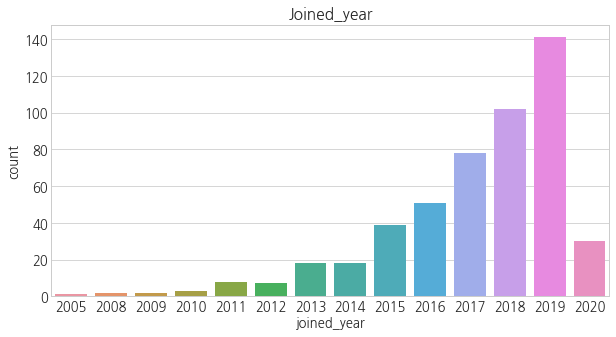

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(df['joined_year'])
plt.title('Joined_year')
plt.show();

* 2015년 전부터 현재 팀에 있는 선수는 20명 미만으로 적다.
* 2019년에 합류한 선수는 140명으로 제일 많다.

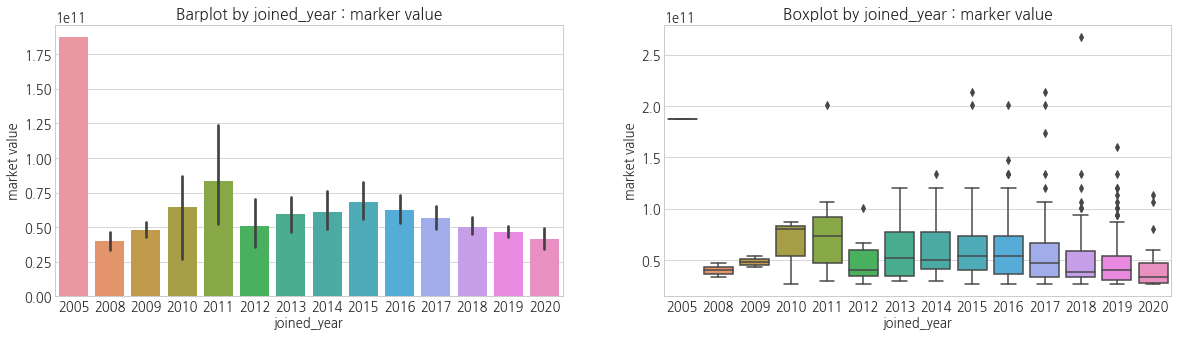

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot('joined_year', 'market value', data=df, ax=ax[0])
ax[0].set_title('Barplot by joined_year : marker value')
sns.boxplot('joined_year', 'market value', data=df, ax=ax[1])
ax[1].set_title('Boxplot by joined_year : marker value')
plt.show();

* 2005년에 합류한 선수의 평균값이 이상한데, 아마 메시인 것으로 보인다. 
    * 확인해보기
* 2015년을 기준으로 최근에 합류한 선수들은 점차 선수 가치가 하락하는 모양을 보인다.
    * 최근에 합류한 선수들의 나이를 함께 살펴보면 어떨까?

In [31]:
# 먼저, 2005년에 합류한 선수가 누구인지 살펴보기.
df[df.joined_year==2005]

,name,age,height,country,position,position-detail,foot,league,team,joined,contract expires,goals,assists,appearances,goals conceded,clean sheets,market value,joined_year
7,Lionel Messi,32,170,Argentina,Forward,Right Winger,left,LaLiga,FC Barcelona,2005-07-01,2021-06-30,24,16,31,0,0,187091818709.18,2005


* 2005년은 메시 단일 레코드가 맞았다.

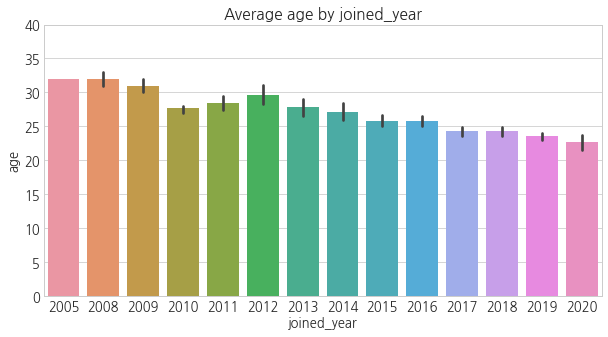

In [32]:
plt.figure(figsize=(10,5))
sns.barplot('joined_year', 'age', data=df)
plt.ylim(0, 40)
plt.title('Average age by joined_year')
plt.show();

* 최근에 합류한 선수일수록 평균 연령이 낮아짐을 알 수 있다.

* 같은 맥락으로, contract expires도 year데이터로 변환시켜 살펴보자.

In [33]:
df['contract expires_year'] = df['contract expires'].dt.year
print('데이터 unique 수:{}\n{}'.format(df['contract expires_year'].nunique(),df['contract expires_year'].value_counts()))

데이터 unique 수:9
2023    142
2024    140
2022    111
2021     40
2025     30
2020     30
2026      4
2019      2
2028      1
Name: contract expires_year, dtype: int64


* 변환하고 보니, 지금은 2020년인데 2019년으로 표기되어있는 선수가 있다.
* 아마 계약이 만료되었지만 현재 팀에서 계속 뛰고 있는 것으로 예측된다.
* 이 선수들을 찾아서 수정해주자.

In [34]:
df[df['contract expires_year'] == 2019]

,name,age,height,country,position,position-detail,foot,league,team,joined,contract expires,goals,assists,appearances,goals conceded,clean sheets,market value,joined_year,contract expires_year
398,Paulinho,31,183,Brazil,Midfielder,Central Midfield,right,Other league,Guangzhou Evergrande Taobao,2019-01-02,2019-03-05,0,0,0,0,0,30736513073.65,2019,2019
423,Luke Shaw,24,181,England,Defender,Left-Back,left,Premier League,Manchester United,2014-07-01,2019-03-05,1,2,26,0,0,29400142940.01,2014,2019


* 파일리뉴는 계약일 정보가 잘 나오지 않는다. 최빈값인 2023년으로 대체하자.
* 루크쇼는 계약을 2023년까지 연장했다는 기사를 찾았다. 이 선수도 2023년으로 변경해주자.

In [35]:
df.loc[df[df['contract expires_year'] == 2019].index, 'contract expires_year'] = 2023

In [36]:
print('데이터 unique 수:{}\n{}'.format(df['contract expires_year'].nunique(),df['contract expires_year'].value_counts()))

데이터 unique 수:8
2023    144
2024    140
2022    111
2021     40
2025     30
2020     30
2026      4
2028      1
Name: contract expires_year, dtype: int64


* 또한, 2026년, 2028년으로 계약한 선수들을 2025년으로 이동시켜주자.

In [37]:
df.loc[df[df['contract expires_year'] == 2026].index, 'contract expires_year'] = 2025
df.loc[df[df['contract expires_year'] == 2028].index, 'contract expires_year'] = 2025

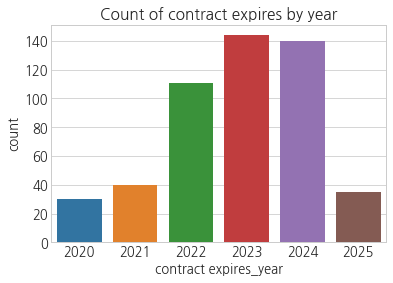

In [38]:
sns.countplot('contract expires_year', data=df)
plt.title('Count of contract expires by year')
plt.show();

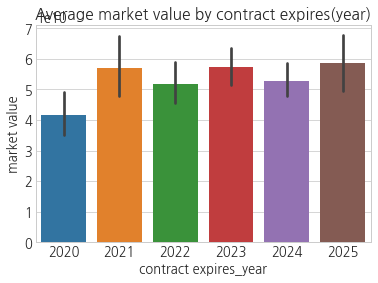

In [39]:
sns.barplot('contract expires_year', 'market value', data=df)
plt.title('Average market value by contract expires(year)')
plt.show();

* 2020년에 만료되는 선수의 시장 가치가 상대적으로 낮지만, 샘플 수 자체가 적었으므로 대표성을 가지기 어려울 것 같다.

### goals, assists

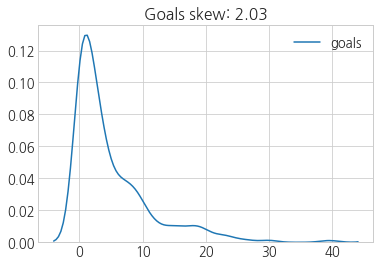

In [40]:
sns.kdeplot(df.goals)
plt.title('Goals skew: {:.2f}'.format(df.goals.skew()))
plt.show();

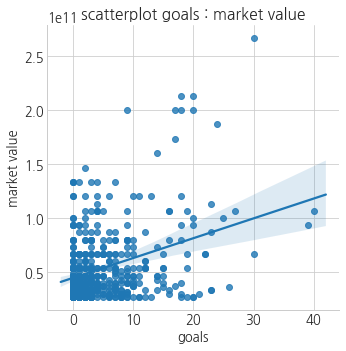

In [41]:
sns.lmplot('goals', 'market value', data=df)
plt.title('scatterplot goals : market value')
plt.show();

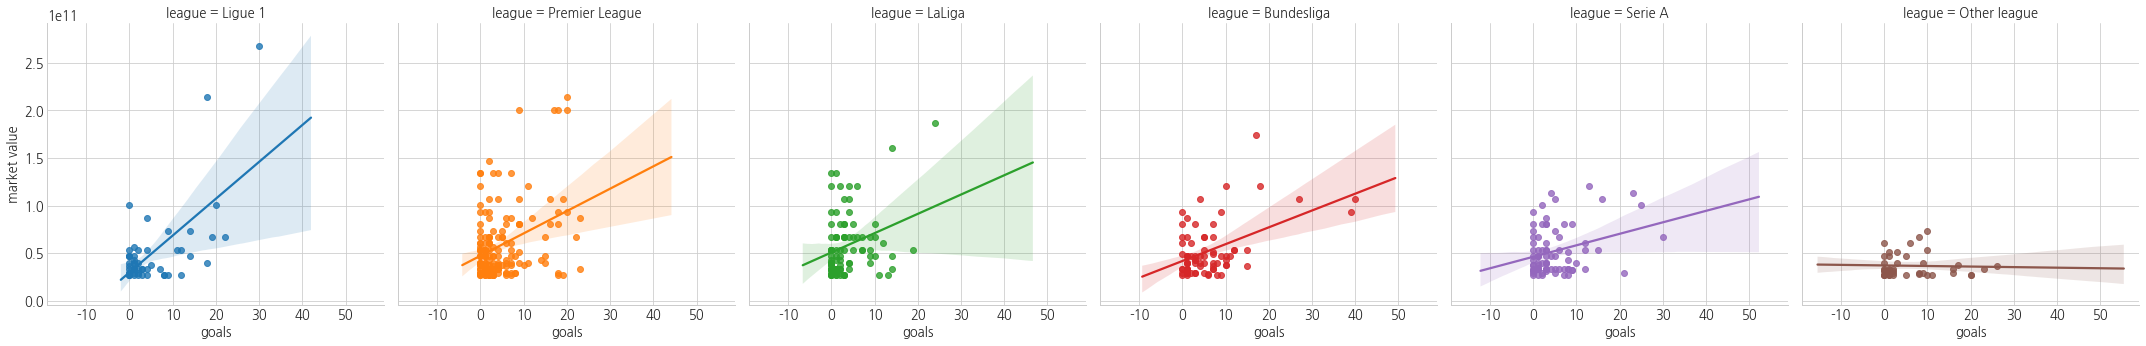

In [42]:
sns.lmplot('goals', 'market value', col='league', hue='league', data=df)
plt.show();

* 골을 많이 넣을수록 시장 가치가 높아지는 것으로 보이나, 그 정도가 리그에 따라 다르다.

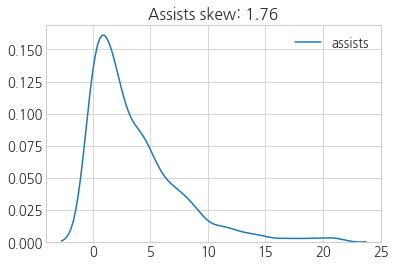

In [43]:
sns.kdeplot(df.assists)
plt.title('Assists skew: {:.2f}'.format(df.assists.skew()))
plt.show();

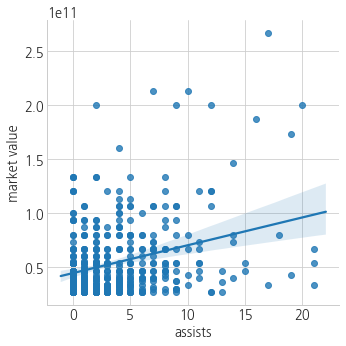

In [44]:
sns.lmplot('assists', 'market value', data=df)

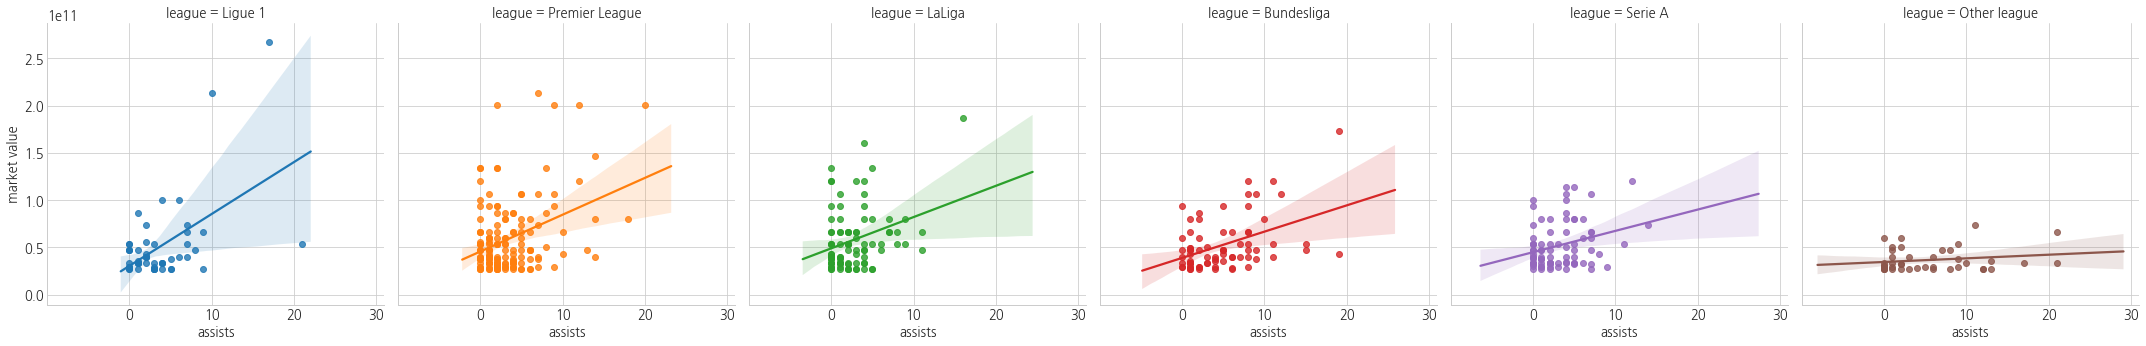

In [45]:
sns.lmplot('assists', 'market value', col='league', hue='league', data=df)

### appearances

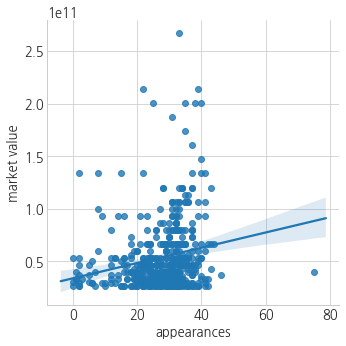

In [46]:
sns.lmplot('appearances', 'market value', data=df)

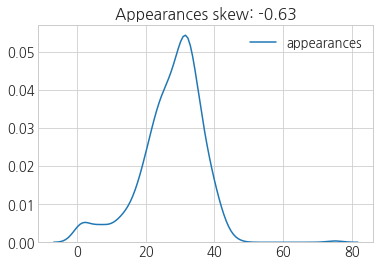

In [47]:
sns.kdeplot(df.appearances)
plt.title('Appearances skew: {:.2f}'.format(df.appearances.skew()))
plt.show();

### goals conceded, clean sheets

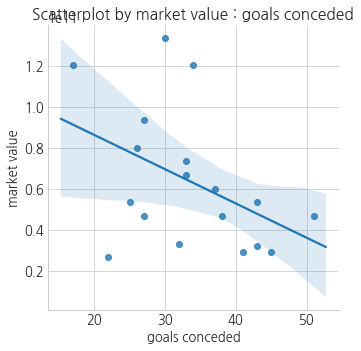

In [48]:
sns.lmplot('goals conceded', 'market value', data=df[df.position=='Goalkeeper'])
plt.title('Scatterplot by market value : goals conceded')
plt.show();

* 실점이 많을수록 가치가 떨어지는 것으로 보여진다.
* 그런데, 경기 수가 많으면 실점 또한 많아질 수 밖에 없다.
* 그러면, 실점 수를 경기 수와 나눈 변수로 계산해보자

In [49]:
df['conbyapp'] = df['goals conceded'] / df['appearances']

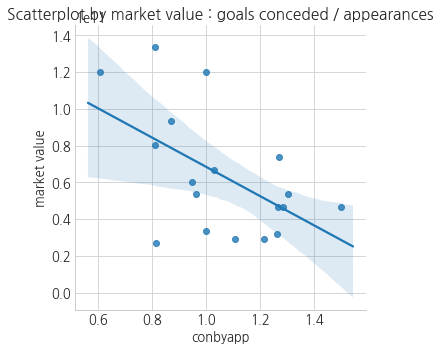

In [50]:
sns.lmplot('conbyapp', 'market value', data=df[df.position=='Goalkeeper'])
plt.title('Scatterplot by market value : goals conceded / appearances')
plt.show();

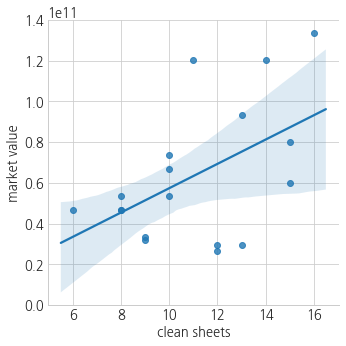

In [51]:
sns.lmplot('clean sheets', 'market value', data=df[df.position=='Goalkeeper'])

* 클린시트 수가 많을수록 시장 가치가 올라가는 모습을 보인다.

In [53]:
df = df[['name', 'age', 'height', 'country', 'position', 'position-detail', 'foot', 'league', 'team', 'joined', 'joined_year', 'contract expires', 'contract expires_year', 'goals', 'assists', 'appearances', 'goals conceded', 'conbyapp', 'clean sheets', 'market value']]

In [54]:
df.to_csv('source/TransferMarket_EDA.csv')